In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
data_to_load=files.upload()

Saving loan_data_set.csv to loan_data_set.csv


In [ ]:
df=pd.read_csv('loan_data_set.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

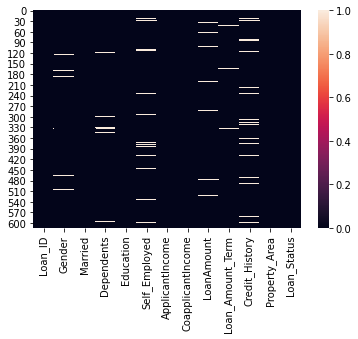

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [ ]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
data_numerical = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [ ]:
data_numerical.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
data_non_numerical=df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]

In [ ]:
data_non_numerical.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [ ]:
data_non_numerical.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [ ]:
data_non_numerical.groupby('Gender')['Loan_ID'].count()

Gender
Female    112
Male      489
Name: Loan_ID, dtype: int64

In [ ]:
x=data_non_numerical.columns
for i in x[1:]:
  m=data_non_numerical.groupby(i)['Loan_ID'].count().idxmax()
  data_non_numerical[i].fillna(m,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
data_non_numerical.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [ ]:
data_non_numerical

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [ ]:
data_numerical.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
x=data_numerical.columns
for i in x:
  m=data_numerical[i].mean()
  data_numerical[i].fillna(m, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
data_numerical.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [ ]:
data_numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [ ]:
data_non_numerical.isnull().sum()


Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [ ]:
data_non_numerical

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


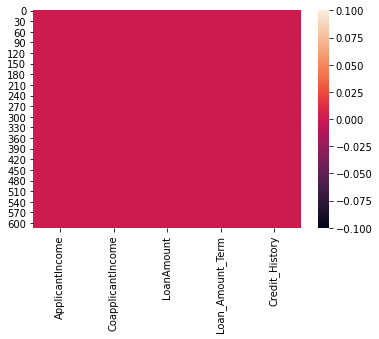

In [ ]:
sns.heatmap(data_numerical.isnull())

In [ ]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


In [ ]:
data_non_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        614 non-null    object
 1   Gender         614 non-null    object
 2   Married        614 non-null    object
 3   Dependents     614 non-null    object
 4   Education      614 non-null    object
 5   Self_Employed  614 non-null    object
 6   Property_Area  614 non-null    object
 7   Loan_Status    614 non-null    object
dtypes: object(8)
memory usage: 38.5+ KB


In [ ]:
data_non_numerical.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dummies=pd.get_dummies(data_non_numerical,columns=['Gender','Married','Dependents',
           'Education', 'Self_Employed', 'Property_Area',   'Loan_Status'])

In [ ]:
dummies

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,LP001003,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
2,LP001005,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
3,LP001006,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1
4,LP001008,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
610,LP002979,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1
611,LP002983,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1
612,LP002984,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_numerical.iloc[:,1:]=sc.fit_transform(data_numerical.iloc[:,1:])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
#data_numerical.iloc[2:8,2:5]

,LoanAmount,Loan_Amount_Term,Credit_History
2,-0.957641,0.279851,0.451640
3,-0.314547,0.279851,0.451640
4,-0.064454,0.279851,0.451640
5,1.436099,0.279851,0.451640
6,-0.612275,0.279851,0.451640
7,0.138001,0.279851,-2.410441


In [ ]:
df_loan=pd.concat([data_numerical.iloc[:,1:],dummies],axis=1)

In [ ]:
df_loan

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,-0.554487,0.000000,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,-0.038732,-0.219273,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
2,-0.554487,-0.957641,0.279851,0.451640,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
3,0.251980,-0.314547,0.279851,0.451640,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1
4,-0.554487,-0.064454,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.554487,-0.898095,0.279851,0.451640,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
610,-0.554487,-1.267279,-2.518655,0.451640,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1
611,-0.472404,1.269371,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1
612,-0.554487,0.483367,0.279851,0.451640,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1


In [ ]:
df_loan.isnull().sum()

CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_N              0
Loan_Status_Y              0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x=df_loan.drop(["Loan_Status_N","Loan_Status_Y"],axis=1)
y=df_loan["Loan_Status_Y"]
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
X_test

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
193,-0.554487,-0.838549,0.279851,4.516405e-01,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
334,0.072423,0.423821,-2.518655,4.516405e-01,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
343,-0.554487,-0.862368,0.279851,4.516405e-01,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0
24,0.445901,0.054637,0.279851,3.177548e-16,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0
47,-0.554487,-0.028727,0.279851,4.516405e-01,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,0.288917,-0.671821,-2.518655,-2.410441e+00,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
31,-0.554487,-0.862368,0.279851,4.516405e-01,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
293,-0.554487,-0.040636,2.145521,-2.410441e+00,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1
410,-0.554487,-1.005278,0.279851,4.516405e-01,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0


In [ ]:
y_test

193    1
334    1
343    1
24     0
47     1
      ..
453    1
31     0
293    0
410    0
108    0
Name: Loan_Status_Y, Length: 123, dtype: uint8

In [ ]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_1=svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred_1))
print(classification_report(y_test,pred_1))
print(accuracy_score(y_test,pred_1))

[[13 24]
 [ 2 84]]
              precision    recall  f1-score   support

           0       0.87      0.35      0.50        37
           1       0.78      0.98      0.87        86

    accuracy                           0.79       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.80      0.79      0.76       123

0.7886178861788617


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred_2=knn.predict(X_test)

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred_2))
print(classification_report(y_test,pred_2))
print(accuracy_score(y_test,pred_2))

[[14 23]
 [ 7 79]]
              precision    recall  f1-score   support

           0       0.67      0.38      0.48        37
           1       0.77      0.92      0.84        86

    accuracy                           0.76       123
   macro avg       0.72      0.65      0.66       123
weighted avg       0.74      0.76      0.73       123

0.7560975609756098


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
pred_3=clf.predict(X_test)
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred_3))
print(classification_report(y_test,pred_3))
print(accuracy_score(y_test,pred_3))

[[14 23]
 [ 5 81]]
              precision    recall  f1-score   support

           0       0.74      0.38      0.50        37
           1       0.78      0.94      0.85        86

    accuracy                           0.77       123
   macro avg       0.76      0.66      0.68       123
weighted avg       0.77      0.77      0.75       123

0.7723577235772358


In [ ]:
#from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
#iris = load_iris()
tree = dtree.fit(X_train, y_train)
pred_4=tree.predict(X_test)


In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred_4))
print(classification_report(y_test,pred_4))
print(accuracy_score(y_test,pred_4))

[[19 18]
 [20 66]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        37
           1       0.79      0.77      0.78        86

    accuracy                           0.69       123
   macro avg       0.64      0.64      0.64       123
weighted avg       0.70      0.69      0.69       123

0.6910569105691057


In [ ]:
avg_pred=(pred_1+pred_2+pred_3+pred_4)//4
acc=accuracy_score(y_test,avg_pred)
print(acc)

0.6829268292682927


In [ ]:
from sklearn.ensemble import  VotingClassifier
from sklearn.ensemble import  BaggingClassifier
from sklearn.ensemble import  AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import  accuracy_score, f1_score, log_loss

In [ ]:
voting_clf=VotingClassifier(estimators=[('SVC', svclassifier),('DTree',dtree),('NB',clf),('KNN',knn)])
voting_clf.fit(X_train, y_train)
preds=voting_clf.predict(X_test)
acc=accuracy_score(y_test, preds)
l_loss=log_loss(y_test, preds)
f1=f1_score(y_test, preds)

print("Accuracy is: "+str(acc))
print("Log Loss is: "+str(l_loss))
print("F1 Score is: "+str(f1))

Accuracy is: 0.6910569105691057
Log Loss is: 10.670626798072515
F1 Score is: 0.7738095238095238
